In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Ames Housing regression model\Ames_outliers_removed.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [5]:
df.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

## calculating the % of missing data

In [7]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [8]:
missing_percent = percent_missing(df)

In [9]:
print(missing_percent)

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

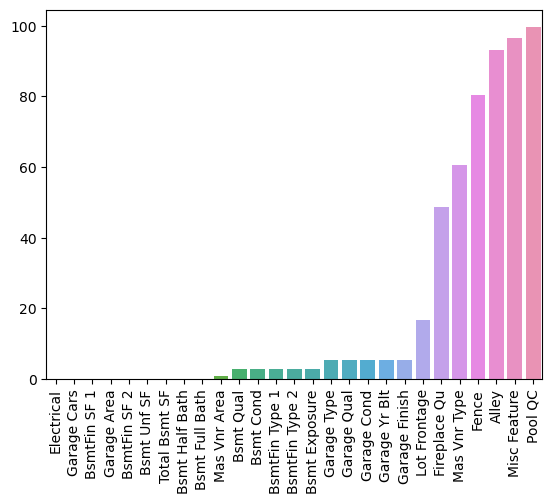

In [10]:
sns.barplot(x = missing_percent.index, y = missing_percent) # .index returns the index labels of the Series, which  are the column names
plt.xticks(rotation = 90) # rotates the x-axis labels by 90 degrees for better readability

## working on rows missing data 

In [11]:
# if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself.

(0.0, 1.0)

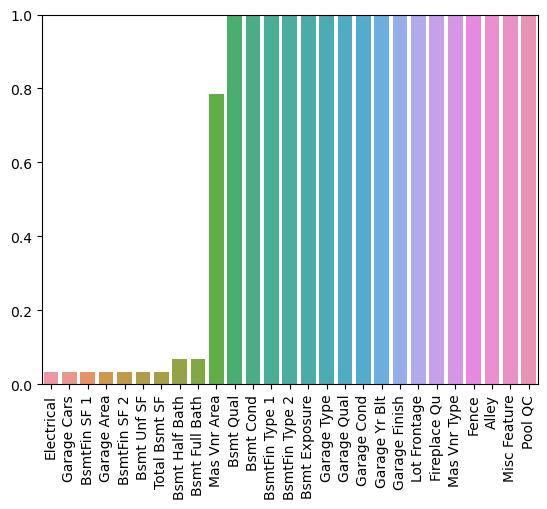

In [12]:
sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)
plt.ylim(0,1) # sets the lower limit of the y-axis to 0 and the upper limit to 1.

In [13]:
missing_percent[missing_percent<1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [14]:
100/len(df)

0.0341646737273659

In [15]:
df[df['Total Bsmt SF'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [16]:
df[df['Bsmt Half Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


## Filling in data based on column names 

In [17]:
# There are 2 types of basement features, numerical and string descriptive

In [18]:
df.filter(like = 'Bsmt').columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

In [19]:
bsmt_col =  df.filter(like = 'Bsmt').columns

In [20]:
selected_col = df[bsmt_col]

In [21]:
selected_col.dtypes

Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
dtype: object

In [22]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [23]:
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [24]:
missing_percent = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'Garage Area'),
  Text(3, 0, 'Mas Vnr Area'),
  Text(4, 0, 'Garage Type'),
  Text(5, 0, 'Garage Yr Blt'),
  Text(6, 0, 'Garage Finish'),
  Text(7, 0, 'Garage Qual'),
  Text(8, 0, 'Garage Cond'),
  Text(9, 0, 'Lot Frontage'),
  Text(10, 0, 'Fireplace Qu'),
  Text(11, 0, 'Mas Vnr Type'),
  Text(12, 0, 'Fence'),
  Text(13, 0, 'Alley'),
  Text(14, 0, 'Misc Feature'),
  Text(15, 0, 'Pool QC')])

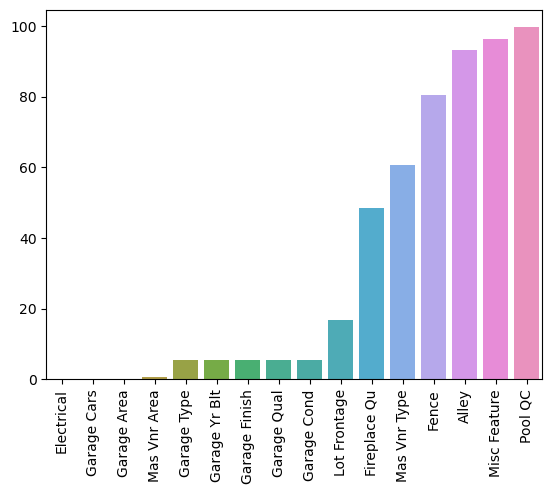

In [25]:
sns.barplot(x = missing_percent.index , y = missing_percent)
plt.xticks(rotation = 90)

## Dropping rows

In [26]:
df = df.dropna( axis = 0 , subset= ['Electrical', 'Garage Cars'])

# axis = specifies rows should be dropped
# subset = ['var1', 'var2'] Specifies the subset of columns to consider when dropping rows. 
# If any of the specified columns have missing values in a row, that row will be dropped.

In [27]:
missing_percent = percent_missing(df)

(0.0, 1.0)

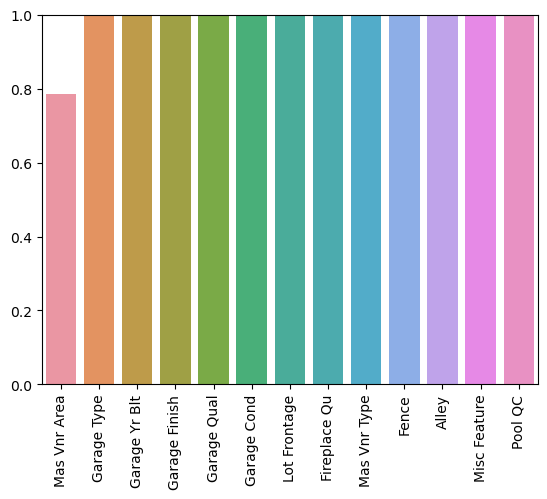

In [28]:
sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [29]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [30]:
missing_percent = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

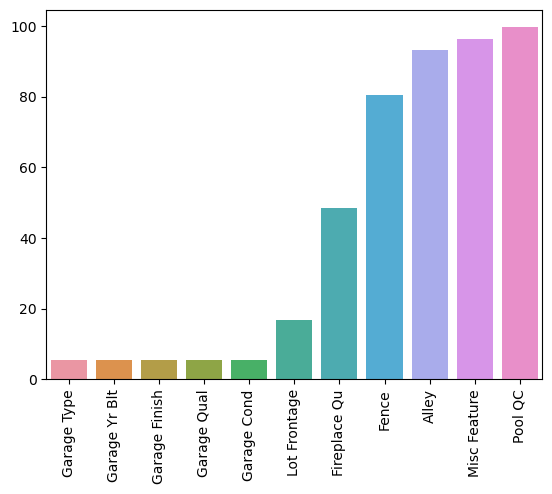

In [31]:
sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)

In [32]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2922,Detchd,1984.0,Unf,TA,TA
2923,Attchd,1983.0,Unf,TA,TA
2924,NaN,NaN,NaN,NaN,NaN
2925,Attchd,1975.0,RFn,TA,TA


In [33]:
# Based on data description, these NaN at id 2924 and similar seem to indicate no garage so we will substitute it with 'None' & '0'

In [34]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [35]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [36]:
missing_percent = percent_missing(df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

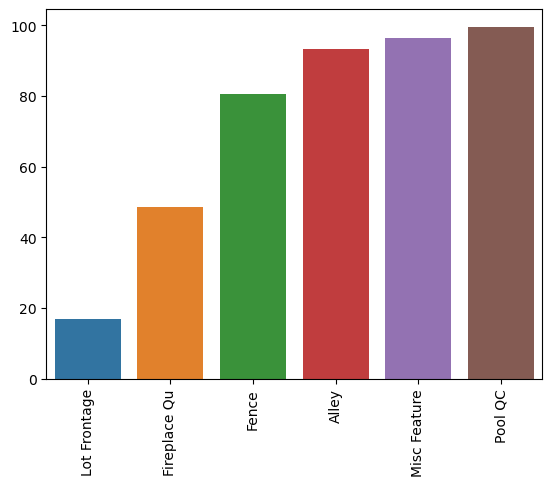

In [37]:
sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)

In [38]:
missing_percent.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [39]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [40]:
# as Pool QC,' Misc Feature', 'Fence',' Alley' would not serve as much information for analysis we will drop these columns

In [41]:
df = df.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'],axis = 1)

In [42]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [43]:
missing_percent = percent_missing(df)

<Axes: >

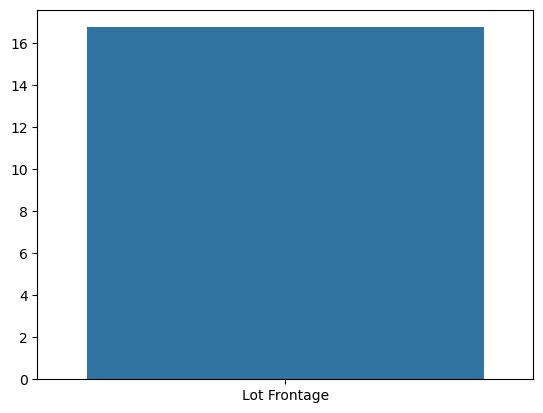

In [44]:
sns.barplot(x = missing_percent.index, y = missing_percent)

## Identifying the relation of missing data

In [45]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage

In [46]:
#-- We need to decide what other filled-in (no NaN values) feature most probably relates and is correlated with the missing feature data. 
#--In this particular case we will use:
#--Neighborhood: Physical locations within Ames city limits
#--LotFrontage: Linear feet of street connected to the property
#--We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [47]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

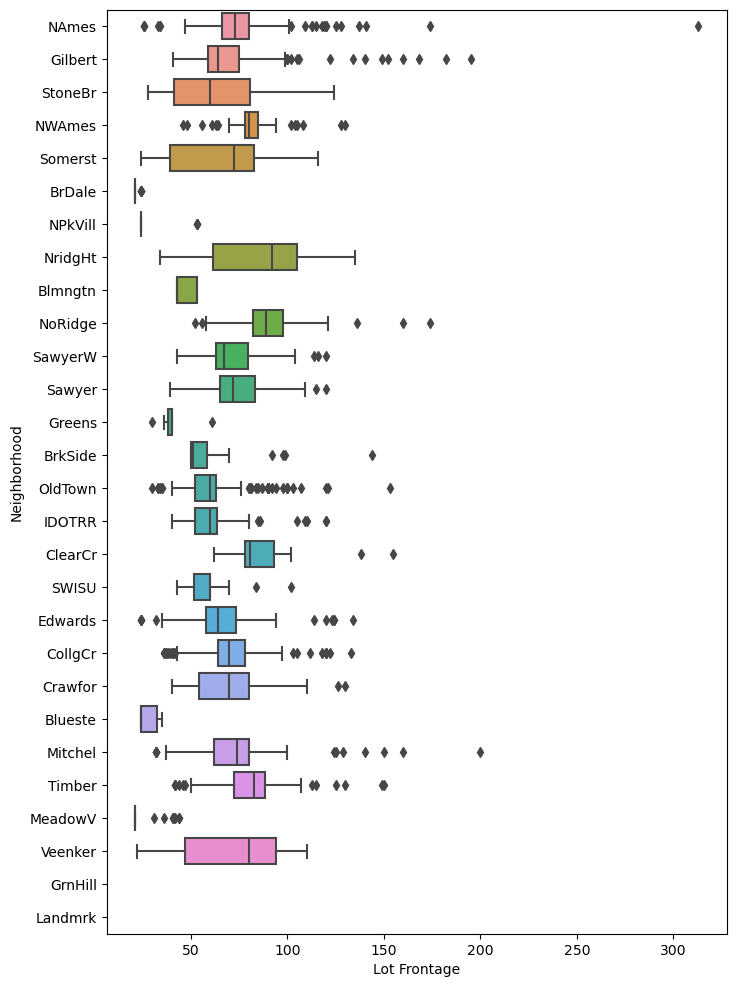

In [48]:
plt.figure(figsize=(8,12))
sns.boxplot(x = 'Lot Frontage' , y = 'Neighborhood', data = df) # checking the spread of data with respect to neigbourhood

In [49]:
# By using groupby function we will group the data by unique neighbourhood and analyze the 'Lot Frontage' values within each neighborhood

In [50]:
#group the data by neighborhood and select the 'lot Frontage' column

In [51]:
df.groupby('Neighborhood')['Lot Frontage']

In [52]:
grouped_data = df.groupby('Neighborhood')['Lot Frontage']

In [53]:
#calculating the mean of Lot Frontage for each neighbourhood

In [54]:
grouped_data.mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [55]:
mean_frontage = grouped_data.mean()

In [56]:
#similarly calculating median and standard deviation 

In [57]:
frontage_median = grouped_data.median()

In [58]:
frontage_median

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.0
Gilbert    64.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.5
Veenker    80.0
Name: Lot Frontage, dtype: float64

In [59]:
grouped_data.std()

Neighborhood
Blmngtn     4.919350
Blueste     5.313505
BrDale      1.137147
BrkSide    12.722818
ClearCr    22.628057
CollgCr    15.940401
Crawfor    19.141262
Edwards    17.623879
Gilbert    28.386654
Greens      9.574271
GrnHill          NaN
IDOTRR     15.487504
Landmrk          NaN
MeadowV     8.521808
Mitchel    26.794499
NAmes      19.686198
NPkVill    10.398489
NWAmes     12.156335
NoRidge    21.990818
NridgHt    26.685697
OldTown    15.642896
SWISU       9.912167
Sawyer     15.165154
SawyerW    14.384331
Somerst    23.984740
StoneBr    21.696189
Timber     23.386025
Veenker    28.637970
Name: Lot Frontage, dtype: float64

In [60]:
std_Frontage = grouped_data.std()

In [61]:
std_Frontage

Neighborhood
Blmngtn     4.919350
Blueste     5.313505
BrDale      1.137147
BrkSide    12.722818
ClearCr    22.628057
CollgCr    15.940401
Crawfor    19.141262
Edwards    17.623879
Gilbert    28.386654
Greens      9.574271
GrnHill          NaN
IDOTRR     15.487504
Landmrk          NaN
MeadowV     8.521808
Mitchel    26.794499
NAmes      19.686198
NPkVill    10.398489
NWAmes     12.156335
NoRidge    21.990818
NridgHt    26.685697
OldTown    15.642896
SWISU       9.912167
Sawyer     15.165154
SawyerW    14.384331
Somerst    23.984740
StoneBr    21.696189
Timber     23.386025
Veenker    28.637970
Name: Lot Frontage, dtype: float64

## Transform Data 

In [62]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [63]:
df[df['Lot Frontage'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,527165230,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,527182190,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,527368020,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,527402200,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,527402250,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,916326010,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,916403130,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,916460070,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,923226150,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [64]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [65]:
df.iloc[21:26]['Neighborhood']

21     NWAmes
22    Somerst
23      NAmes
24      NAmes
25      NAmes
Name: Neighborhood, dtype: object

In [66]:
# preserving data integrity and consistecy

In [67]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val : val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [68]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val : val.fillna(val.mean()))

In [69]:
missing_percent = percent_missing(df)

<Axes: >

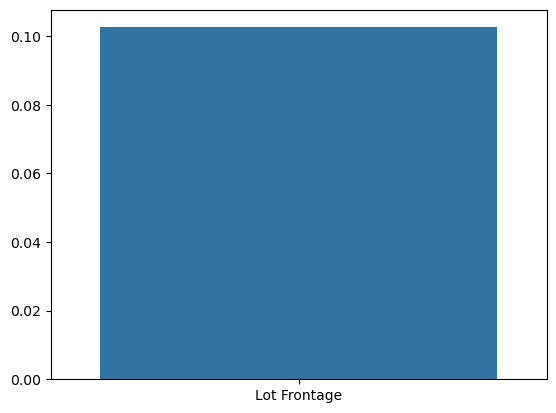

In [70]:
sns.barplot(x = missing_percent.index, y = missing_percent)

In [71]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [72]:
missing_percent = percent_missing(df)

In [73]:
missing_percent

Series([], dtype: float64)

In [74]:
# naw we don't have any missing data in our final dataset 

In [75]:
df.to_csv(r'Ames_clean_data.csv', index = False)